# Grocordinates for the data 

In [1]:
with open('map_locations.txt','r') as f:
    file = f.read()
print(len(file))

112203


In [2]:
file[:1000]

'{\n"type": "FeatureCollection",\n"name": "home_map_points_april2022",\n"crs": { "type": "name", "properties": { "name": "urn:ogc:def:crs:OGC:1.3:CRS84" } },\n"features": [\n{ "type": "Feature", "properties": { "field_1": 0, "Cities": "Ad Dammam", "Ref": "<a href=\\"https:\\/\\/transitcosts.com\\/projects\\/addammam-dammam-metro-a-sharqiya\\" target=\\"_tab\\">Dammam Metro (a-Sharqiya)<\\/a>", "lat": 26.4282, "lng": 50.0997, "Link": "<a href=\\"https:\\/\\/transitcosts.com\\/cities\\/Ad-Dammam\\/\\"target=\\"_tab\\">Ad Dammam<\\/a>" }, "geometry": { "type": "Point", "coordinates": [ 50.0997, 26.4282 ] } },\n{ "type": "Feature", "properties": { "field_1": 1, "Cities": "Adana", "Ref": "<a href=\\"https:\\/\\/transitcosts.com\\/projects\\/adana-first-stage\\" target=\\"_tab\\">First stage<\\/a>", "lat": 36.995, "lng": 35.32, "Link": "<a href=\\"https:\\/\\/transitcosts.com\\/cities\\/Adana\\/\\"target=\\"_tab\\">Adana<\\/a>" }, "geometry": { "type": "Point", "coordinates": [ 35.32, 36.995

In [3]:
import pandas as pd
import json

# Load the GeoJSON data
data = json.loads(file)


In [4]:
data['features'][1]

{'type': 'Feature',
 'properties': {'field_1': 1,
  'Cities': 'Adana',
  'Ref': '<a href="https://transitcosts.com/projects/adana-first-stage" target="_tab">First stage</a>',
  'lat': 36.995,
  'lng': 35.32,
  'Link': '<a href="https://transitcosts.com/cities/Adana/"target="_tab">Adana</a>'},
 'geometry': {'type': 'Point', 'coordinates': [35.32, 36.995]}}

In [5]:
import pandas as pd
import json

# Load the GeoJSON data
data = json.loads(file)


# Initialize empty lists to store data
cities = []
lat = []
lon = []

# Loop through the features and extract data
for feature in data['features']:
    properties = feature['properties']
    cities.append(properties['Cities'])
    lat.append(properties['lat'])
    lon.append(properties['lng'])
# Create a DataFrame
df = pd.DataFrame({
    'City': cities,
    'Lat': lat,
    'Lon': lon,
})


In [6]:
df

,City,Lat,Lon
0,Ad Dammam,26.428200,50.099700
1,Adana,36.995000,35.320000
2,Ahmadabad,23.030100,72.580000
3,Amsterdam,52.350000,4.916600
4,Ankara,39.927200,32.864400
...,...,...,...
148,Xi'an,34.275000,108.895000
149,Xiamen,24.450000,118.080000
150,Xuzhou,34.205769,117.284126
151,Zhengzhou,34.755000,113.665100


In [7]:
import geopandas as gpd
gdf = gpd.GeoDataFrame(
    df, geometry=gpd.points_from_xy(df.Lon, df.Lat), crs="EPSG:4326"
)

<Axes: >

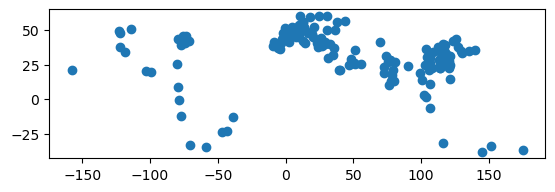

In [8]:
gdf.plot()

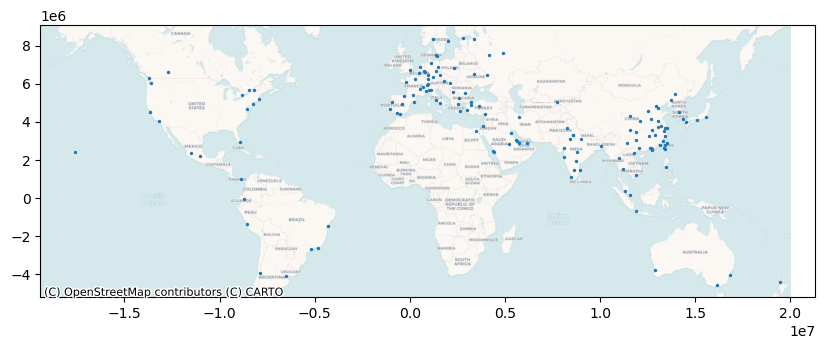

In [14]:
# your code here
import contextily as ctx
import matplotlib.pyplot as plt
gdf=gdf.to_crs('EPSG:3857')
fig, ax = plt.subplots(figsize=(10,10))
#documentation for gdf.plot https://geopandas.org/en/stable/docs/reference/api/geopandas.GeoDataFrame.plot.html
#Legend_kwds allows us to pass a dictionary with arguments for two other pyplot functions. I use matplotlib.pyplot.colorbar to modify the legend. 
#colours: https://matplotlib.org/stable/gallery/color/colormap_reference.html
gdf.plot(ax=ax, markersize=2)
ctx.add_basemap(ax, crs=3857, source=ctx.providers.CartoDB.Voyager)